In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Replace '/content/drive/MyDrive/Nlp_Dawn_news_Dataset/2019.csv' with your actual file path
file_path = '/content/drive/MyDrive/Nlp_Dawn_news_Dataset/2019.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Get the first 10 rows
first_10000_rows = data.head(10000)

# Save the first 10 rows to a new CSV file named 'temp.csv'
first_10000_rows.to_csv('data.csv', index=False)


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import string
import gensim
import operator
import re

In [4]:
df_news = pd.read_csv('/content/data.csv')
df_news.head()

category/tags                                           headline  \
0             not given,  India to let Huawei take part in 5G trials - W...   
1             not given,  In pictures: Revellers around the world usher ...   
2             not given,  Government will not bulldoze new NAB law throu...   
3             not given,  Penn Badgley accidentally confirms You will ha...   
4  World  Indian Muslims  India prepares for New Year's Eve with fresh p...   

                                              author  \
0                                                AFP   
1                                           Dawn.com   
2                                           Dawn.com   
3  \r\n                            Images Staff  ...   
4                                            Reuters   

                                                link  \
0  https://www.dawn.com/news/1525461/india-to-let...   
1  https://www.dawn.com/news/1525460/in-pictures-...   
2  https://www.dawn.com/news/1525459/government-w...   
3  https://www.dawn.com/news/1525457/penn-badgley...   
4  https://www.dawn.com/news/1525458/india-prepar...   

                                   short_description                  date  
0  New Delhi has said it will let Chinese telecom...     December 31, 2019  
1  Revellers around the globe on Tuesday bid fare...  01 Jan, 2020 12:28am  
2  Government's chief spokesperson Dr Firdous Ash...     December 31, 2019  
3  You star Penn Badgley accidentally revealed he...  31 Dec, 2019 06:00pm  
4  Thousands of Indians are set to ring in the Ne...     December 31, 2019

In [5]:
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#function for data cleaning and processing
#This can be further enhanced by adding / removing reg-exps as desired.

def spacy_tokenizer(sentence):

    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)

    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)

    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)

    #creating token object
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]

    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    #return tokens
    return tokens

In [6]:
print ('Cleaning and Tokenizing...')
%time df_news['short_description_token'] = df_news['short_description'].map(lambda x: spacy_tokenizer(x))

df_news.head()

Cleaning and Tokenizing...
CPU times: user 18min 32s, sys: 6.03 s, total: 18min 38s
Wall time: 18min 51s


category/tags                                           headline  \
0             not given,  India to let Huawei take part in 5G trials - W...   
1             not given,  In pictures: Revellers around the world usher ...   
2             not given,  Government will not bulldoze new NAB law throu...   
3             not given,  Penn Badgley accidentally confirms You will ha...   
4  World  Indian Muslims  India prepares for New Year's Eve with fresh p...   

                                              author  \
0                                                AFP   
1                                           Dawn.com   
2                                           Dawn.com   
3  \r\n                            Images Staff  ...   
4                                            Reuters   

                                                link  \
0  https://www.dawn.com/news/1525461/india-to-let...   
1  https://www.dawn.com/news/1525460/in-pictures-...   
2  https://www.dawn.com/news/1525459/government-w...   
3  https://www.dawn.com/news/1525457/penn-badgley...   
4  https://www.dawn.com/news/1525458/india-prepar...   

                                   short_description                  date  \
0  New Delhi has said it will let Chinese telecom...     December 31, 2019   
1  Revellers around the globe on Tuesday bid fare...  01 Jan, 2020 12:28am   
2  Government's chief spokesperson Dr Firdous Ash...     December 31, 2019   
3  You star Penn Badgley accidentally revealed he...  31 Dec, 2019 06:00pm   
4  Thousands of Indians are set to ring in the Ne...     December 31, 2019   

                             short_description_token  
0  [new, delhi, let, chinese, telecom, giant, hua...  
1  [reveller, globe, tuesday, bid, farewell, deca...  
2  [government, chief, spokesperson, firdous, ash...  
3  [star, penn, badgley, accidentally, reveal, he...  
4  [thousand, indians, set, ring, new, year, hold...

In [7]:
news_plot = df_news['short_description_token']
news_plot[0:5]

0    [new, delhi, let, chinese, telecom, giant, hua...
1    [reveller, globe, tuesday, bid, farewell, deca...
2    [government, chief, spokesperson, firdous, ash...
3    [star, penn, badgley, accidentally, reveal, he...
4    [thousand, indians, set, ring, new, year, hold...
Name: short_description_token, dtype: object

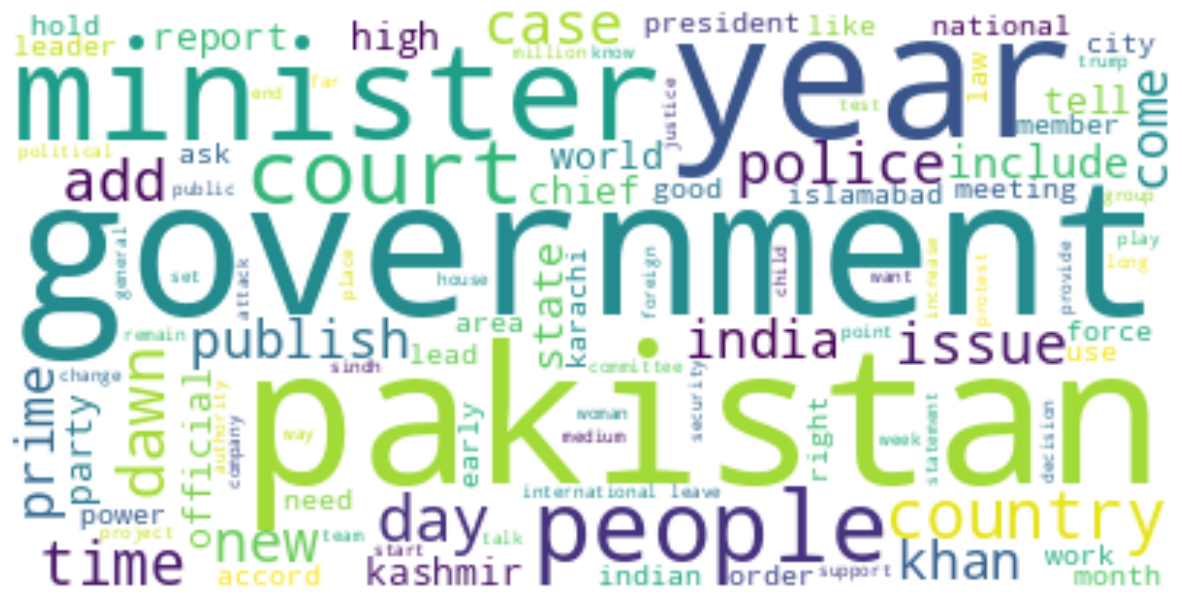

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(news_plot)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
from gensim import corpora

#creating term dictionary
%time dictionary = corpora.Dictionary(news_plot)

#filter out terms which occurs in less than 4 documents and more than 20% of the documents.
#NOTE: Since we have smaller dataset, we will keep this commented for now.

#dictionary.filter_extremes(no_below=4, no_above=0.2)

#list of few which which can be further removed
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

CPU times: user 3.34 s, sys: 11 ms, total: 3.36 s
Wall time: 3.36 s


In [10]:
#print top 50 items from the dictionary with their unique token-id
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['accord', 0], ['accusation', 1], ['acknowledge', 2], ['active', 3], ['agency', 4], ['alleged', 5], ['announce', 6], ['announcement', 7], ['association', 8], ['australia', 9], ['ban', 10], ['battle', 11], ['billion', 12], ['blame', 13], ['block', 14], ['boost', 15], ['britain', 16], ['chairman', 17], ['china', 18], ['chinese', 19], ['close', 20], ['come', 21], ['communication', 22], ['company', 23], ['country', 24], ['deal', 25], ['decision', 26], ['delhi', 27], ['deny', 28], ['equipment', 29], ['eric', 30], ['european', 31], ['expect', 32], ['fall', 33], ['firm', 34], ['forecast', 35], ['freeze', 36], ['germany', 37], ['giant', 38], ['global', 39], ['government', 40], ['hard', 41], ['huawei', 42], ['huge', 43], ['include', 44], ['india', 45], ['indian', 46], ['indias', 47], ['intelligence', 48], ['internet', 49], ['japan', 50]]]


In [11]:
corpus = [dictionary.doc2bow(desc) for desc in news_plot]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('accord', 1), ('accusation', 1), ('acknowledge', 1), ('active', 1), ('agency', 1), ('alleged', 1), ('announce', 1), ('announcement', 1), ('association', 1), ('australia', 1), ('ban', 3), ('battle', 1), ('billion', 2), ('blame', 1), ('block', 1), ('boost', 1), ('britain', 1), ('chairman', 1), ('china', 1), ('chinese', 2), ('close', 1), ('come', 2), ('communication', 1), ('company', 5), ('country', 1), ('deal', 1), ('decision', 2), ('delhi', 1), ('deny', 1), ('equipment', 2), ('eric', 1), ('european', 1), ('expect', 2), ('fall', 1), ('firm', 3), ('forecast', 1), ('freeze', 1), ('germany', 1), ('giant', 1), ('global', 1), ('government', 2), ('hard', 1), ('huawei', 8), ('huge', 1), ('include', 1), ('india', 3), ('indian', 2), ('indias', 3), ('intelligence', 1), ('internet', 3), ('japan', 1), ('late', 1), ('leader', 1), ('let', 1), ('lobby', 1), ('low', 1), ('major', 2), ('market', 2), ('million', 1), ('minister', 1), ('mobile', 2), ('monday', 1), ('month', 1), ('monthly', 1), ('network'

In [12]:
%time news_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time news_lsi_model = gensim.models.LsiModel(news_tfidf_model[corpus], id2word=dictionary, num_topics=300)

CPU times: user 574 ms, sys: 990 µs, total: 575 ms
Wall time: 578 ms
CPU times: user 35.3 s, sys: 7.28 s, total: 42.6 s
Wall time: 36.1 s


In [13]:
%time gensim.corpora.MmCorpus.serialize('news_tfidf_model_mm', news_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('news_lsi_model_mm',news_lsi_model[news_tfidf_model[corpus]])

CPU times: user 8.47 s, sys: 264 ms, total: 8.73 s
Wall time: 8.9 s
CPU times: user 11.9 s, sys: 327 ms, total: 12.2 s
Wall time: 12.3 s


In [14]:
#Load the indexed corpus
news_tfidf_corpus = gensim.corpora.MmCorpus('news_tfidf_model_mm')
news_lsi_corpus = gensim.corpora.MmCorpus('news_lsi_model_mm')

print(news_tfidf_corpus)
print(news_lsi_corpus)

MmCorpus(10000 documents, 62655 features, 1773622 non-zero entries)
MmCorpus(10000 documents, 300 features, 3000000 non-zero entries)


In [15]:
from gensim.similarities import MatrixSimilarity

%time news_index = MatrixSimilarity(news_lsi_corpus, num_features = news_lsi_corpus.num_terms)

CPU times: user 5.67 s, sys: 77.4 ms, total: 5.75 s
Wall time: 5.94 s


In [25]:
from operator import itemgetter

def search_similar_news(search_term):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = news_tfidf_model[query_bow]
    query_lsi = news_lsi_model[query_tfidf]

    news_index.num_best = 10

    news_list = news_index[query_lsi]

    news_list.sort(key=itemgetter(1), reverse=True)
    news_names = []

    for j, news in enumerate(news_list):

        news_names.append (
            {
                'Relevance': round((news[1] * 100),2),
                'news_link': df_news['link'][news[0]],
                'news_detail': df_news['short_description'][news[0]]
            }

        )
        if j == (news_index.num_best-1):
            break

    return pd.DataFrame(news_names, columns=['Relevance','news_link','news_detail'])

In [30]:
q=input("ENTER YOUR NEWS SEARCH ABOUT PAKISTAN :  ")
search_similar_news(q)


ENTER YOUR NEWS SEARCH ABOUT PAKISTAN :  terrorism


Relevance                                          news_link  \
0      77.53  https://www.dawn.com/news/1513839/terrorism-to...   
1      75.39  https://www.dawn.com/news/1514620/editorial-pa...   
2      65.18  https://www.dawn.com/news/1524578/two-atcs-not...   
3      64.50  https://www.dawn.com/news/1507486/world-faces-...   
4      61.88  https://www.dawn.com/news/1510729/us-welcomes-...   
5      61.14  https://www.dawn.com/news/1515425/misuse-of-an...   
6      60.52  https://www.dawn.com/news/1515042/pakistan-dis...   
7      56.28  https://www.dawn.com/news/1508204/atc-returns-...   
8      56.24  https://www.dawn.com/news/1514558/us-sees-gaps...   
9      55.19  https://www.dawn.com/news/1501110/nacta-slaps-...   

                                         news_detail  
0  The Supreme Court on Wednesday issued a judgme...  
1  WHAT constitutes terrorism? The Supreme Court ...  
2  KARACHI: The home authorities have notified tw...  
3  United Nations Secretary-General Antonio Guter...  
4  WASHINGTON: The United States has welcomed Pak...  
5  LAST week’s Supreme Court verdict has laid dow...  
6  The Foreign Office on Tuesday said it was "dis...  
7  The case pertaining to the murder of TV anchor...  
8  WASHINGTON: Pakistan implements international ...  
9  RAWALPINDI: The Nat­i­o­nal Counter Terrorism ...

ENTER YOUR NEWS SEARCH ABOUT PAKISTAN :  ASAD


In [22]:
print(q)

ASAD
